In [1]:
%load_ext autoreload
%autoreload 2

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import pathlib

from omegaconf import OmegaConf

from src.utils.visualization import plot_comparison_histogram

In [3]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)

In [75]:
# Parse configs
cfg = OmegaConf.load('../config.yaml')

# Prepare paths
raw_data_path = pathlib.Path(cfg.paths.data.raw)
raw_filepath = raw_data_path / cfg.files.raw_dataset

dict_keys(['time_utc', 'cat_technology', 'lat', 'long', 'download_kbit'])

## Explore the dataset

In [4]:
! ls -l ../data/raw

total 116980
-rw-r--r-- 1 heckert heckert     13395 Jan 23 14:15 LIZENZ.txt
-rw-r--r-- 1 heckert heckert 119769717 Jan 23 14:15 netztest-opendata.csv


In [5]:
df = pd.read_csv('../data/raw/netztest-opendata.csv')

In [20]:
pandas_profiling.ProfileReport(
    df, minimal=True
)

Summarize dataset:   0%|          | 0/58 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [67]:
for col in df.columns:
    print(col, df[col].dtype)

open_uuid object
open_test_uuid object
time_utc datetime64[ns]
cat_technology object
network_type object
lat float64
long float64
loc_src object
loc_accuracy float64
gkz float64
zip_code float64
country_location object
download_kbit float64
upload_kbit float64
ping_ms float64
lte_rsrp float64
lte_rsrq float64
server_name object
test_duration int64
num_threads float64
platform object
model object
client_version object
network_mcc_mnc object
network_name object
sim_mcc_mnc object
nat_type object
asn float64
ip_anonym object
ndt_download_kbit float64
ndt_upload_kbit float64
implausible bool
signal_strength float64
pinned bool
kg_nr float64
gkz_sa float64
land_cover float64
cell_area_code float64
cell_location_id float64
channel_number float64
radio_band float64
settlement_type float64
link_id float64
link_name object
link_distance float64
edge_id float64
link_frc float64
dtm_level float64
signal_classification float64
time_hour int64
daytime_category category


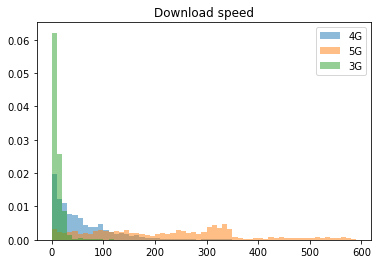

In [17]:
allowed_values = ['3G', '4G', '5G']
filter_ = df.cat_technology.isin(allowed_values)

plot_comparison_histogram(
    df[filter_].download_kbit/1e3,
    df[filter_].cat_technology,
    bins=np.arange(0, 600, 10),
    title='Download speed by technology'
)

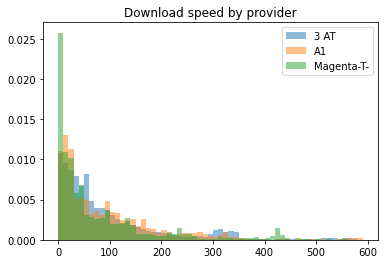

In [66]:
tmp_filter = filter_ & df.network_name.isin(['A1', '3 AT', 'Magenta-T-'])

plot_comparison_histogram(
    df[tmp_filter].download_kbit/1e3,
    df[tmp_filter].network_name,
    bins=np.arange(0, 600, 10),
    title='Download speed by provider'
)

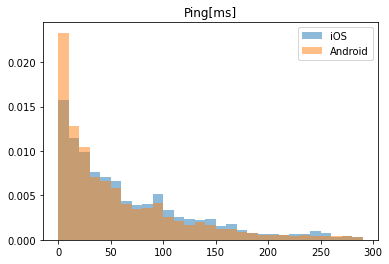

In [77]:
plot_comparison_histogram(
    df[filter_].download_kbit/1e3,
    df[filter_].platform,
    bins=np.arange(0, 300, 10),
    title='Ping[ms]'
)

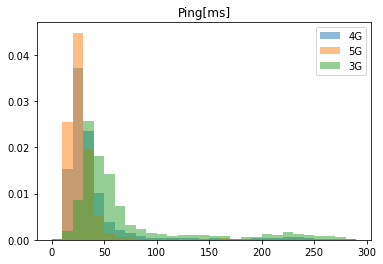

In [18]:
plot_comparison_histogram(
    df[filter_].ping_ms,
    df[filter_].cat_technology,
    bins=np.arange(0, 300, 10),
    title='Ping[ms]'
)

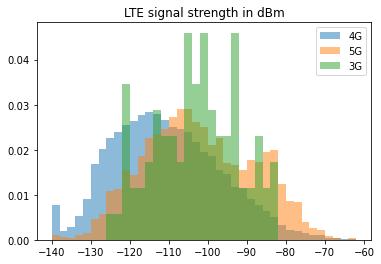

In [60]:
plot_comparison_histogram(
    df[filter_].lte_rsrp,
    df[filter_].cat_technology,
    title='LTE signal strength in dBm',
    bins=np.arange(-140, -60, 2)
)

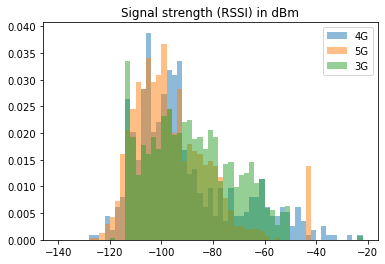

In [61]:
plot_comparison_histogram(
    df[filter_].signal_strength,
    df[filter_].cat_technology,
    title='Signal strength (RSSI) in dBm',
    bins=np.arange(-140, -20, 2)
)

<AxesSubplot:title={'center':'Time of day'}>

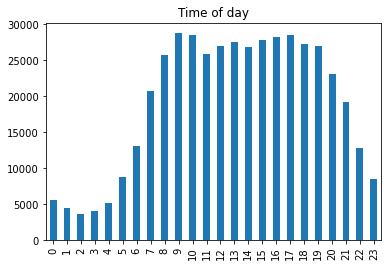

In [31]:
df.time_utc = pd.to_datetime(df.time_utc)
df['time_hour'] = df.time_utc.dt.hour

df.time_hour.value_counts() \
    .sort_index() \
        .plot(kind='bar', title='Time of day')

In [35]:
df['daytime_category'] = pd.cut(df.time_hour,range(0,25, 6))

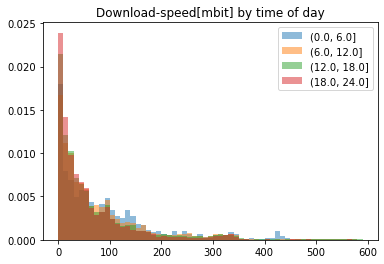

In [51]:
plot_comparison_histogram(
    df[filter_].download_kbit/1e3,
    df[filter_].daytime_category,
    bins=np.arange(0, 600, 10),
    title='Download-speed[mbit] by time of day'
)

<AxesSubplot:xlabel='daytime_category'>

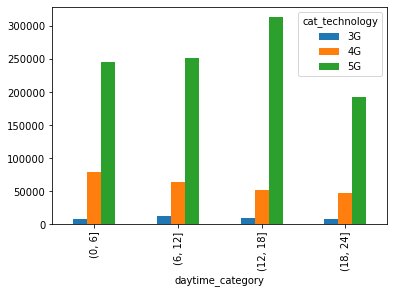

In [49]:
df[filter_] \
    .groupby(['cat_technology', 'daytime_category']) \
        ['download_kbit'].mean().unstack().transpose() \
            .plot(kind='bar')

In [76]:
df.platform.value_counts()

Android    133970
iOS         53842
Name: platform, dtype: int64

In [39]:
df[filter_].daytime_category.value_counts()

(12, 18]    12341
(6, 12]     12236
(18, 24]     5510
(0, 6]       2699
Name: daytime_category, dtype: int64